### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

### `Domain` 
- Internet and Entertainment

### 1. Import the necessary packages

In [295]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(color_codes=True)
%matplotlib inline

In [296]:
import warnings
warnings.filterwarnings('ignore')

### 2. Read the 3 datasets into dataframes

In [297]:
#Reading rating dataset from Data.csv
dsRating = pd.read_csv('Data.csv')

#Reading movie dataset from item.csv
dsMovie = pd.read_csv('item.csv')

#Reading user dataset from user.csv
dsUser = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations
 - Note that you will need to do it for all the three datasets seperately

In [298]:
#Checking the top 5 rows from rating dataset
dsRating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [299]:
#Info for rating dataset
dsRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [300]:
#shape for rating dataset
dsRating.shape

(100000, 4)

In [301]:
#describe for rating dataset
dsRating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [302]:
#missing values for rating dataset, field wise
dsRating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [303]:
#Total number of missing values in rating dataset
dsRating.isnull().sum().sum()

0

In [304]:
#Adding a new column to movie dataset for release date (converted release date from object to datetime)
dsMovie['release_date'] = pd.to_datetime(dsMovie['release date'])

In [305]:
#Adding a new column release year to movie dataset
dsMovie['release_year'] = dsMovie['release_date'].dt.year

In [306]:
#Checking top 5 rows from movie dataset
dsMovie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date,release_year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995-01-01,1995


In [307]:
#Info for movie dataset
dsMovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      1681 non-null   int64         
 1   movie title   1681 non-null   object        
 2   release date  1681 non-null   object        
 3   unknown       1681 non-null   int64         
 4   Action        1681 non-null   int64         
 5   Adventure     1681 non-null   int64         
 6   Animation     1681 non-null   int64         
 7   Childrens     1681 non-null   int64         
 8   Comedy        1681 non-null   int64         
 9   Crime         1681 non-null   int64         
 10  Documentary   1681 non-null   int64         
 11  Drama         1681 non-null   int64         
 12  Fantasy       1681 non-null   int64         
 13  Film-Noir     1681 non-null   int64         
 14  Horror        1681 non-null   int64         
 15  Musical       1681 non-null   int64   

In [308]:
#shape for movie dataset
dsMovie.shape

(1681, 24)

In [309]:
#describe for movie dataset
dsMovie.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,...,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.00000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,...,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062,1989.38608
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,...,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751,14.25358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.00000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.00000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1995.00000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.00000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1998.00000


In [310]:
#missing values for movie dataset, field wise
dsMovie.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_date    0
release_year    0
dtype: int64

In [311]:
#Total number of missing values in movie dataset
dsMovie.isnull().sum().sum()

0

In [312]:
#Info for user dataset
dsUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [313]:
#shape for user dataset
dsUser.shape

(943, 5)

In [314]:
#describe for user dataset
dsUser.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [315]:
#missing values for user dataset, field wise
dsUser.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [316]:
#Total number of missing values in user dataset
dsUser.isnull().sum().sum()

0

**Observations:**

**Rating dataset:**

- Rating dataset has 100000 rows and 4 columns

- All 4 columns are integer data type

- There are no null values in the dataset

- Rating min value is 1, max is 5, average is 3.52 and middle value (median) is 4. Since mean <         median, rating distribution is -ve or left skewed. 

- From the 5 point summary (especially 50% and 75% values), we can see that rating 4 has more count     compared to other rating values.

**Movie dataset:**

- Movie dataset has 1681 rows and 22 columns (2 new columns are added for release_date in datetime     type and release_year which is the year from release_date)

- The original dataset has integer and object types, new columns added release_date and release_year   are datetime and integer types respectively. 

- There are no null values in the dataset

- Movie dataset has data from year 1922 to 1998

- From the mean, we can see that highest number of movies are in genre drama, followed by Commedy.
  The lowest count is in genre unknown

**User dataset:**

- User dataset has 943 rows and 5 columns.
- This dataset has integer and object data types
- There are no null values in the dataset
- Age min value is 7, max is 73, average is 34 and middle value (median) is 31
- Since mean > median, age distribution is +ve or right skewed
- More users are in the middle age

### 4. Find the number of movies per genre using the item data

In [317]:
# #Form a dataset with just movie genres
# dsMovieGenre = dsMovie[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
# #taking sum
# dsMovieGenre.sum()

#Take sum on genre columns
dsMovie.drop(['movie id','movie title','release date','release_date','release_year'], axis=1).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [318]:
#Can also be done using value_counts
dsMovie.drop(['movie id','movie title','release date','release_date','release_year'], axis=1).apply(pd.Series.value_counts).T[1]

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
Name: 1, dtype: int64

**Insights:**

Highest number of movies are in genre Drama, followed by Comedy and then Action and Thriller. Lowest number of movies are in unknown (just one movie)


### 5. Drop the movie where the genre is unknown

In [319]:
#dropping movie id that has genre = unknown from item data
dsMovie.drop(dsMovie[dsMovie['unknown'] == 1].index,inplace=True)

#since there is only one movie in unknown genre and that is dropped, we can drop the column unknown from this dataset
dsMovie.drop(columns=['unknown'],axis=1,inplace=True)

#to verify if the one row with unknown genre is dropped
dsMovie.shape

(1680, 23)

**Insights:**

There is only one movie in genre unknown. Since the question says to drop the movie with genre unknown, I dropped the row from Movie dataset. And then we are left with 'unknown' column with all zeros, so that is also dropped. This brings down the number of rows to 1680.

### 6. Find the movies that have more than one genre

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [320]:
#All movie titles and number of genres for each movie title (including that have just 1 genre)
dsMovieGrTitle = dsMovie[['movie title','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
dsMovieGrTitle.set_index('movie title',inplace=True)
dsMovieGrTitle.sum(axis=1)

movie title
Toy Story                              3
GoldenEye                              3
Four Rooms                             1
Get Shorty                             3
Copycat                                3
                                      ..
Mat' i syn                             1
B. Monkey                              2
Sliding Doors                          2
You So Crazy                           1
Scream of Stone (Schrei aus Stein)     1
Length: 1680, dtype: int64

In [321]:
#Movies that have more than one genre and the number of genres
dsMovieGrTitle[dsMovieGrTitle.sum(axis=1) > 1].sum(axis=1)

movie title
Toy Story             3
GoldenEye             3
Get Shorty            3
Copycat               3
Twelve Monkeys        2
                     ..
MURDER and murder     3
Tainted               2
Mirage                2
B. Monkey             2
Sliding Doors         2
Length: 849, dtype: int64

In [322]:
#total number of movies which have more than one genres
len(dsMovieGrTitle[dsMovieGrTitle.sum(axis=1) > 1])

849

**Insights:**

First I found all movies and the total number of genres for each, including the ones that have just one genre. Then applied slicing to get the movies that have more than one genre and displayed movie title and number of genres for them. There are 849 such movies.


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

*HINT: Use distplot for age and countplot for release year, ratings, *


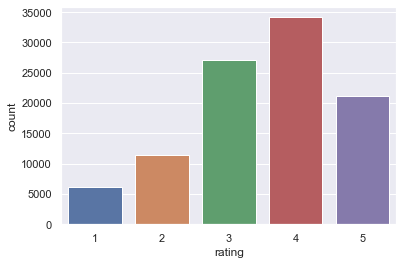

In [323]:
#count plot of rating
sns.countplot(x='rating',data=dsRating);


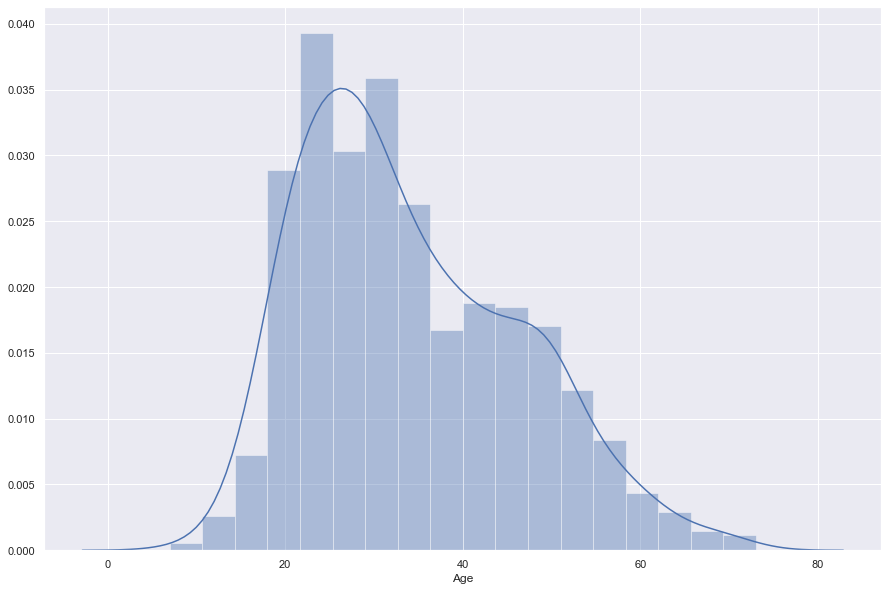

In [324]:
#distplot of age with kde true
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(dsUser['age'],axlabel='Age');

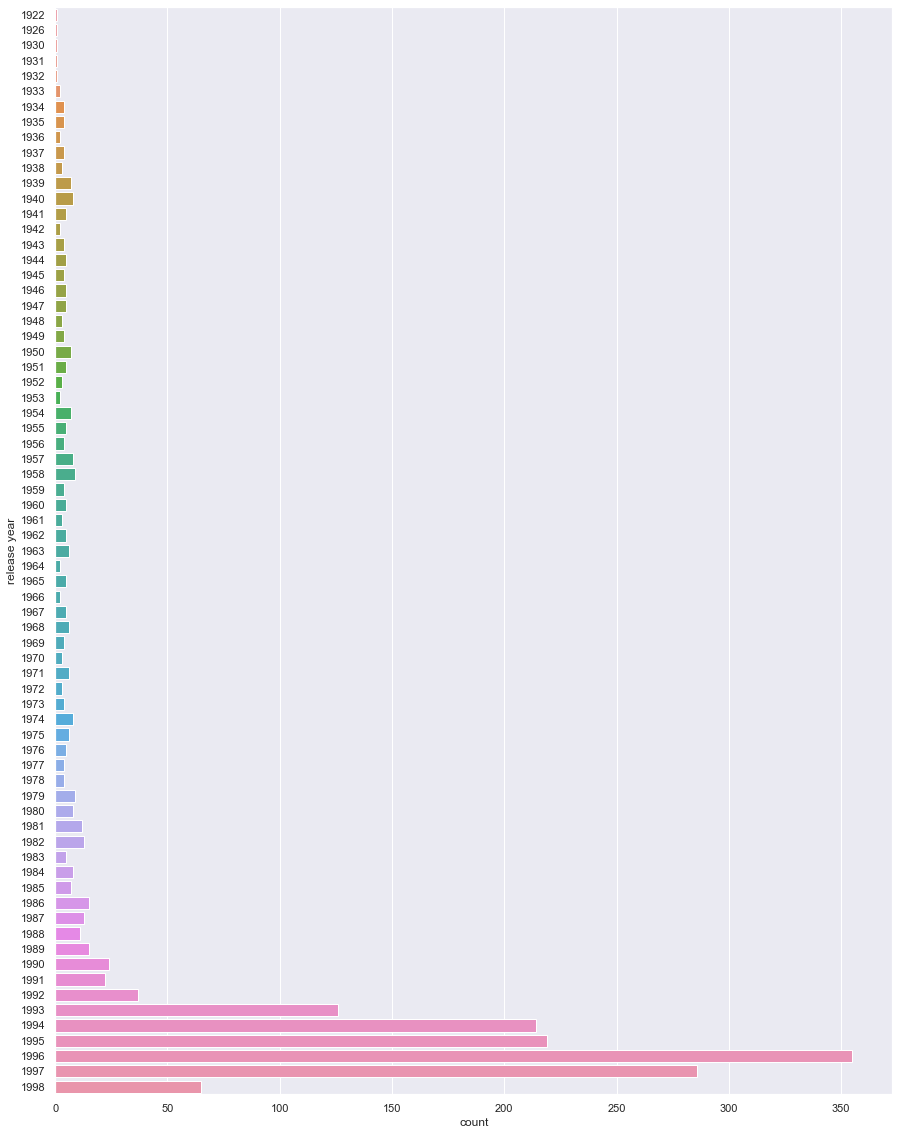

In [325]:
#Count plot for release year
#Already added a new column in movie dataset for release date with datetime type
fig, ax = plt.subplots(figsize=(15,20))
chart = sns.countplot(y=dsMovie['release_year']);
chart.set(ylabel="release year");

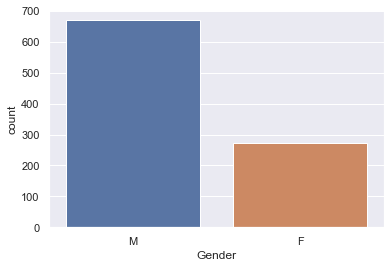

In [326]:
#Count plot for Gender
chart = sns.countplot(x='gender',data=dsUser);
chart.set(xlabel="Gender");

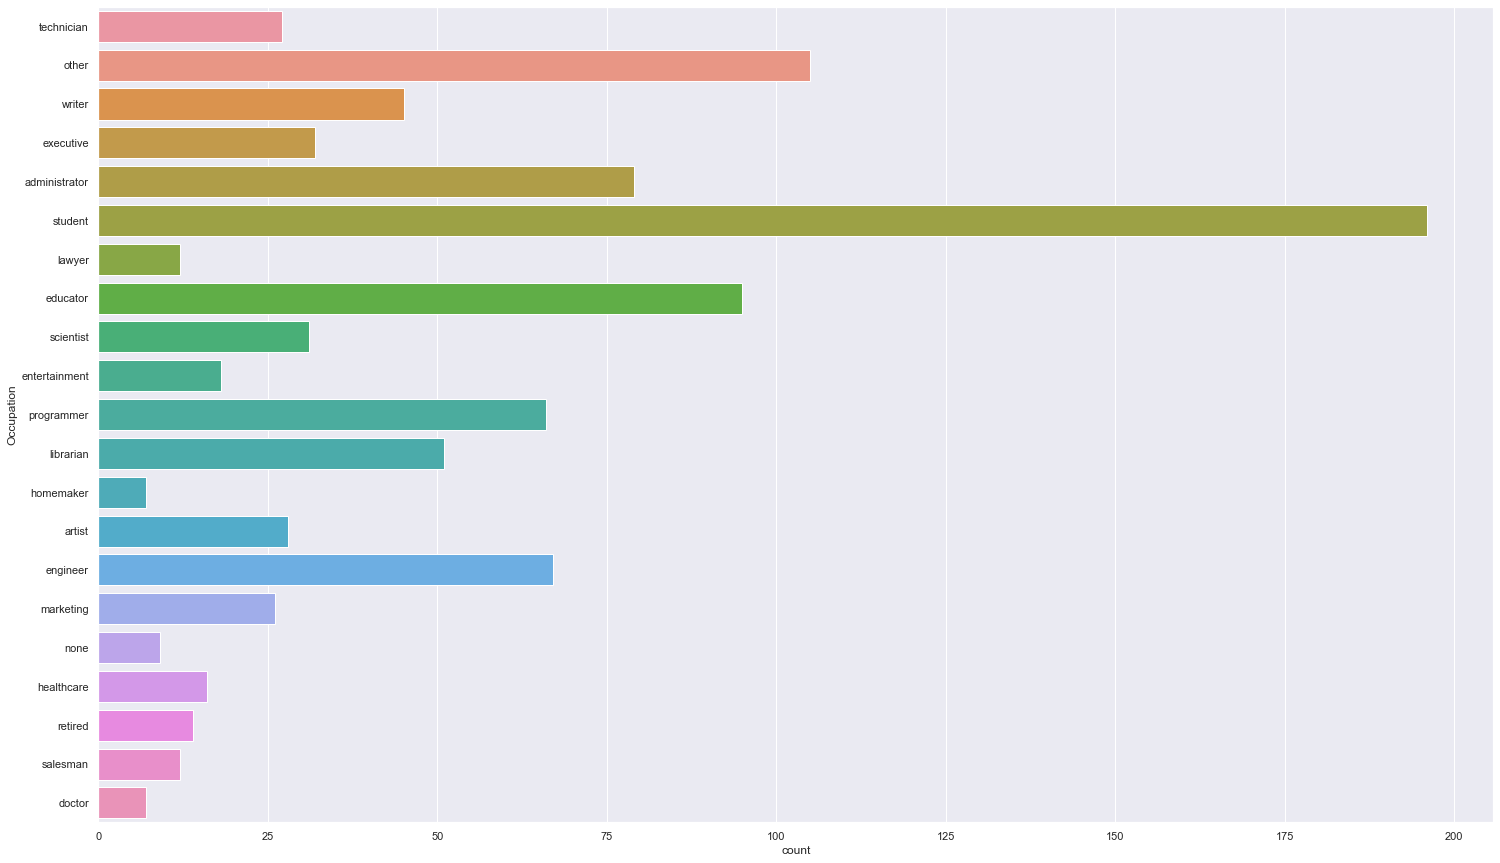

In [327]:
#Count plot for Occupation
fig, ax = plt.subplots(figsize=(25,15))
chart = sns.countplot(y='occupation',data=dsUser);
chart.set(ylabel="Occupation");

### 8. Visualize how popularity of genres has changed over the years

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [328]:
#Dataset with release_year and genre columns only
dsMovieGrYear = dsMovie[['release_year','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]

#Group by on release_year and save as a new dataset
#This dataset has release_year as index and movie genres as columns
dsMovieGrYear_grouped = dsMovieGrYear.groupby(by='release_year').sum()

#Add total column total = sum of releases for year and genre
dsMovieGrYear_grouped['total'] = dsMovieGrYear.groupby(by='release_year').agg({'release_year':'count'})

#Divide the value of each genre by total to get percentage number of release in a year 
percent = dsMovieGrYear_grouped.div(dsMovieGrYear_grouped['total'], axis= 0) * 100

percent = percent.round(2)

percent.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release_year,,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1931,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
1932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,100.0


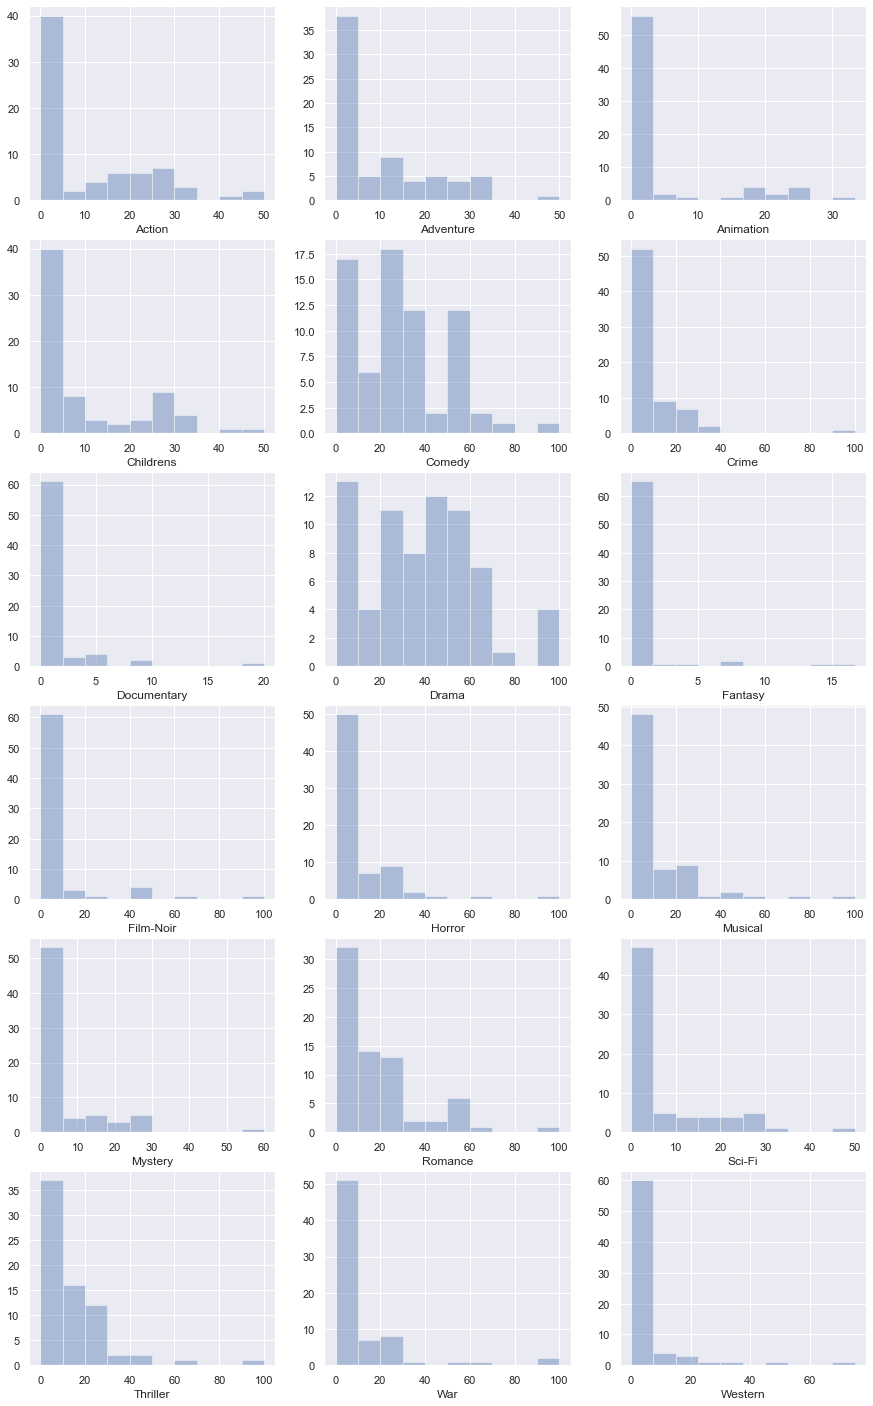

In [329]:
#univariate plots of percent of number of releases over the years
fig, ax = plt.subplots(figsize=(15,25))

for i, column in enumerate(percent[['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].columns, 1):    
    ax1 = plt.subplot(6,3,i)
    sns.distplot(percent[column],kde=False,bins=10);
#     plt.hist(percent[column])
#     ax1.set_xlabel(column)

In [330]:
#Heatmap
percent_pt = percent.reset_index()[['release_year','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
percent_pt.set_index('release_year',inplace=True)
percent_pt = percent_pt.round(2)
#percent_pt.head(100)

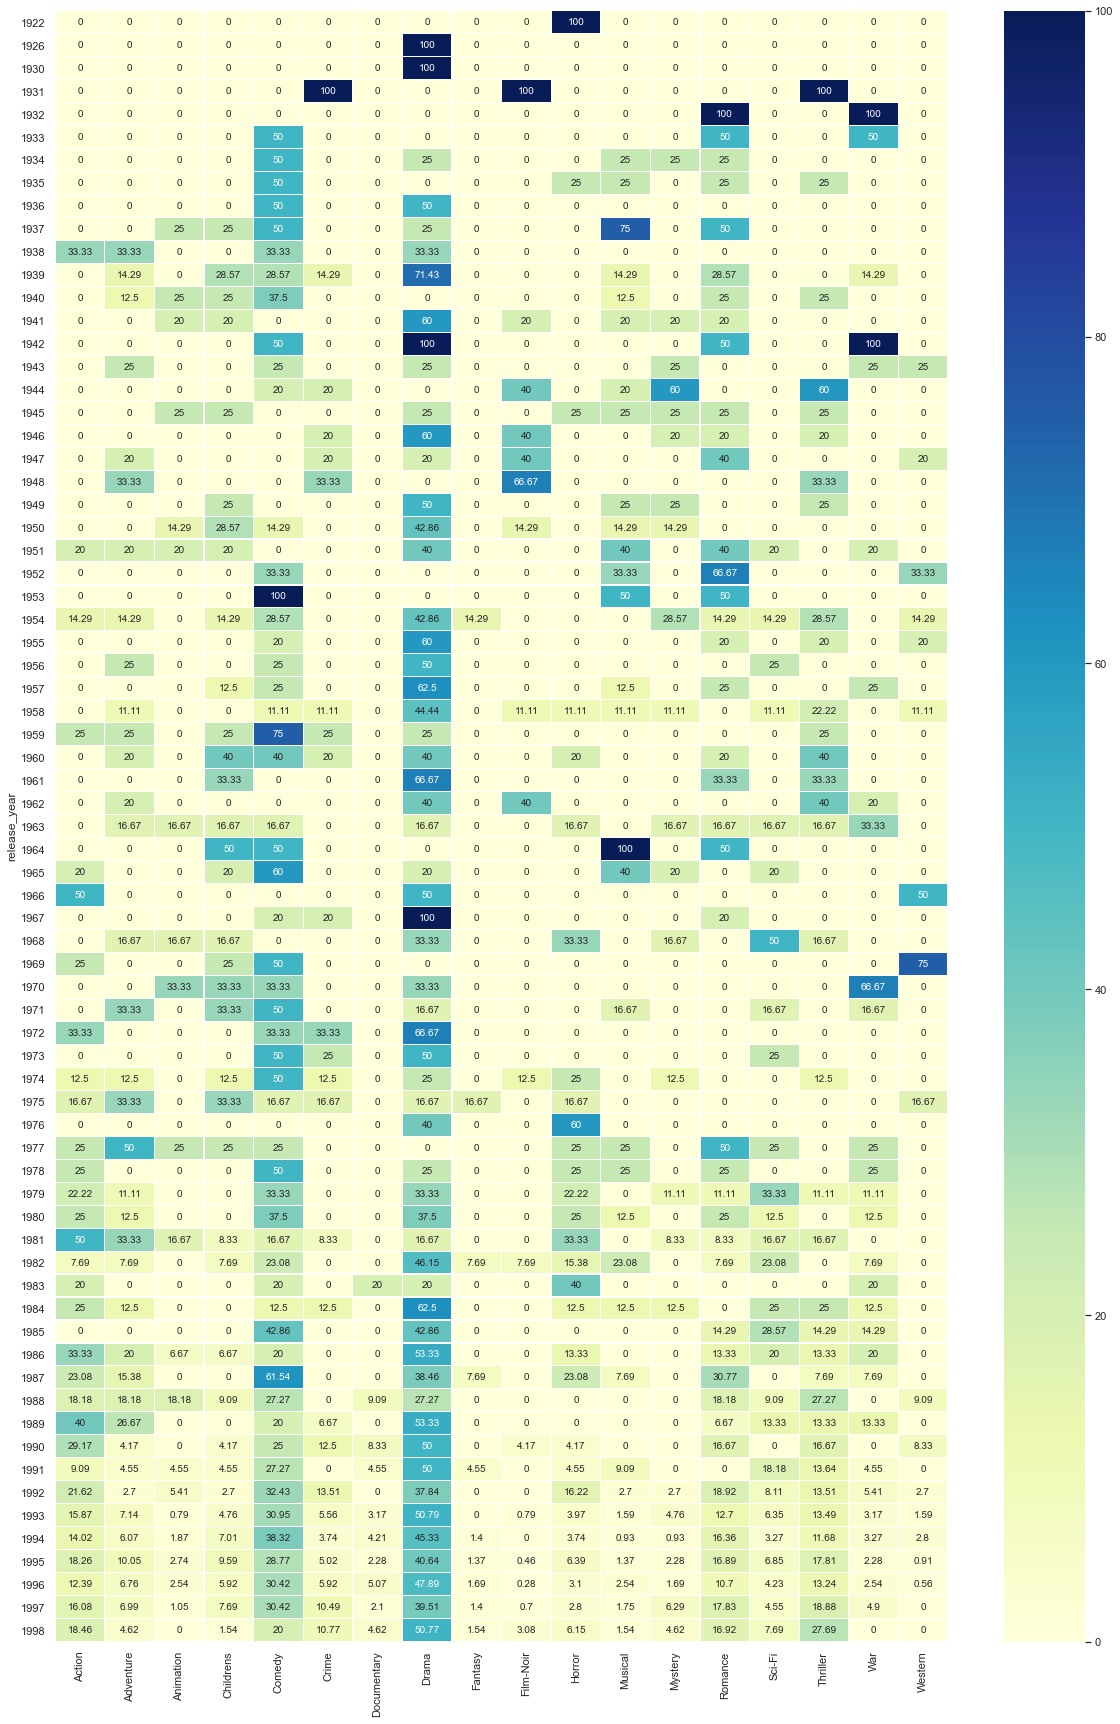

In [331]:
#heatmap to visualize the percent of number of releases over the years
fig, ax = plt.subplots(figsize=(20,30));
sns.heatmap(percent_pt,linewidths=0.1,annot=True,fmt='g',cmap='YlGnBu');

**Insights:**

Created a dataset with 'release year' as index and all movie genres as columns, with one row for each year, by doing group by on release year and taking sum.Then added a column 'total' to the dataset, total is calculated by taking count of movies on group by release year. Then calculated the precentage by dividing each cell with the total and did round to 2 decimal plcaes.

First did dist plot (kde=False) for 'percent of number of releases' for each genre separately, 6*3 plot to show univariate distribution for 18 genres. 

Can also use a matplotlib hist plot for the univariate plots.

Also did heatmap with release year and 'percent of number of releases' for all 18 genres, which clearly shows how the percentage varies over the years for each genre.

Drama has more movies released, followed by Comedy.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [332]:
#count and avg of rating for each movie id in rating dataset
dsRating_grouped = dsRating[['movie id','rating']].groupby(by='movie id').agg({'movie id':'count','rating':'mean'}).rename(columns={'movie id':'count','rating':'rating_avg'})

#slice to get movies with more than 100 ratings
dsRating_grouped_1 = dsRating_grouped[dsRating_grouped['count'] > 100]

#Sort on avg rating and choose top 25 movies
dsRating_grouped_2 = dsRating_grouped_1.sort_values(by='rating_avg',ascending=False).head(25)

#Merge with movie dataset to get movie titles
pd.merge(dsRating_grouped_2,dsMovie,how='inner',on='movie id')[['movie id','movie title']]

,movie id,movie title
0,408,"Close Shave, A"
1,318,Schindler's List
2,169,"Wrong Trousers, The"
3,483,Casablanca
4,64,"Shawshank Redemption, The"
5,603,Rear Window
6,12,"Usual Suspects, The"
7,50,Star Wars
8,178,12 Angry Men
9,134,Citizen Kane


### 10. Check for the validity of the below statements with respect to the data provided

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [333]:
#merge the three datasets

#first merge movie and rating datasets
dsMovie_Rating = pd.merge(dsMovie,dsRating,on='movie id',how='outer')

#merge the above dataset with user data
dsAll = pd.merge(dsMovie_Rating,dsUser,on='user id',how='outer')

#Choose movie title, gender, genre and rating columns only
df = dsAll[['gender','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]

#group by on gender and sum genre
df_grp = df.groupby(by='gender').sum()

# Add total column total = total ratings for men and women
df_grp['total'] = df_grp.sum(axis=1)

#df_grp.head()

#divide each entry by total and get percentage
df_grp.div(df_grp['total'], axis= 0) * 100


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


**Conclusion:**

- Men watch more drama than women - This statement is False, 20.4% women and 18.18% men watch drama 
- Women watch more Sci-Fi than men - This statement is False, 4.89% women and 6.35% men watch sci-fi
- Men watch more Romance than women - This statement is False, 10.9% women and 8.56% men watch         romance
